<a href="https://colab.research.google.com/github/tanya835/Stock-Forecast-model/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance scikit-learn matplotlib pandas

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Get Unitech stock data for last 2 years
data = yf.download("UNITECH.NS", start="2023-01-01", end="2025-01-01")
data.head()


/tmp/ipython-input-1312286275.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("UNITECH.NS", start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,UNITECH.NS,UNITECH.NS,UNITECH.NS,UNITECH.NS,UNITECH.NS
Date,,,,,
2023-01-02,1.80,1.85,1.75,1.80,1847829
2023-01-03,1.80,1.85,1.75,1.80,1283323
2023-01-04,1.85,1.85,1.75,1.85,2267942
2023-01-05,1.80,1.85,1.80,1.85,2087329
2023-01-06,1.80,1.80,1.75,1.80,1535792


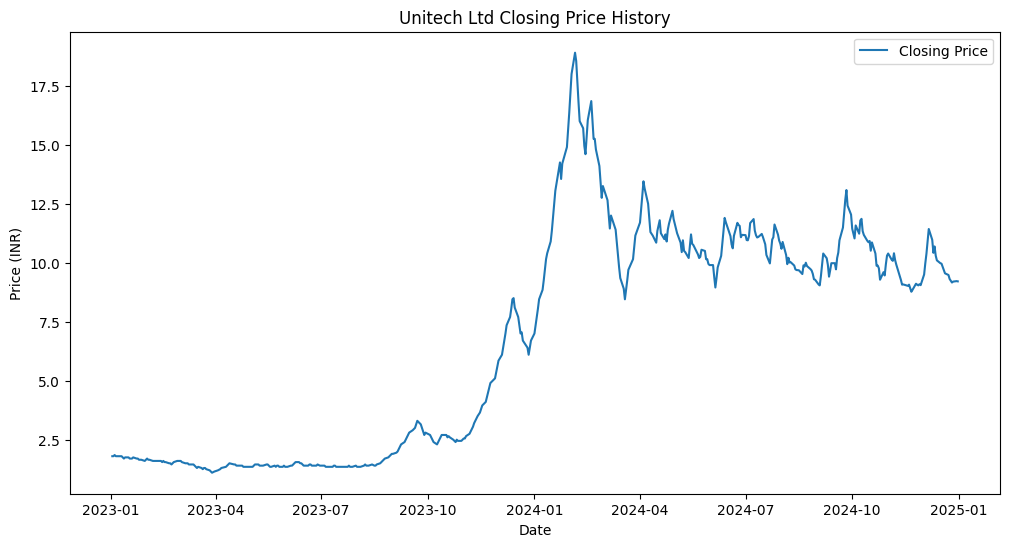

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label="Closing Price")
plt.title("Unitech Ltd Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


In [ ]:
data = data.reset_index()
data['Day'] = np.arange(len(data))

X = data[['Day']]
y = data['Close']


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing (no shuffle to keep time order)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)



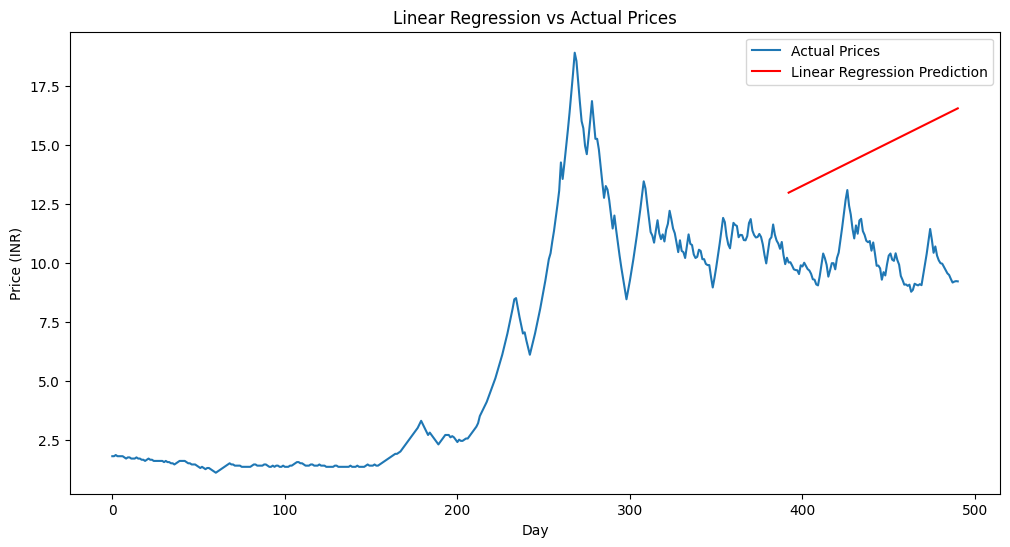

In [ ]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(data['Day'], y, label="Actual Prices")
plt.plot(X_test, y_pred_lr, label="Linear Regression Prediction", color="red")
plt.title("Linear Regression vs Actual Prices")
plt.xlabel("Day")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


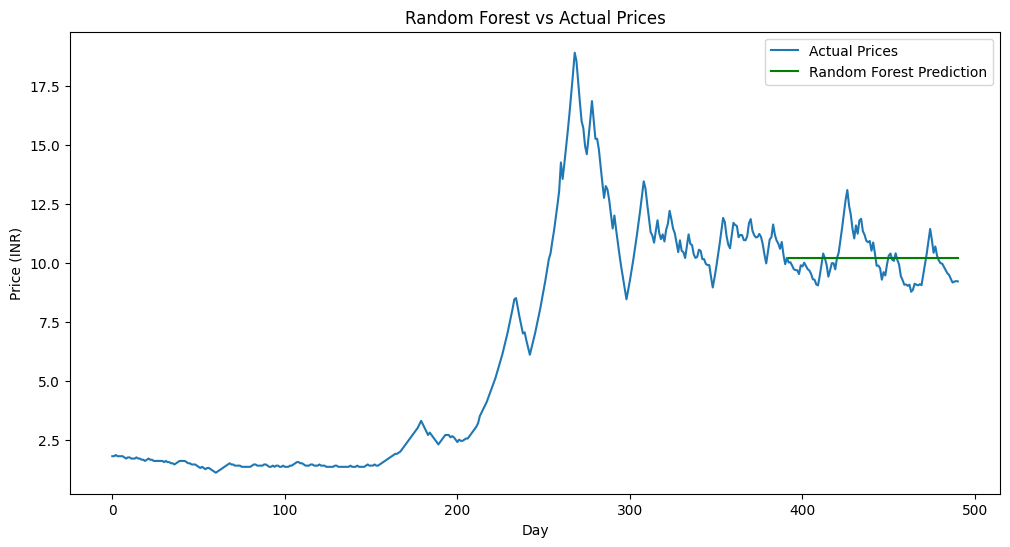

In [ ]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(data['Day'], y, label="Actual Prices")
plt.plot(X_test, y_pred_rf, label="Random Forest Prediction", color="green")
plt.title("Random Forest vs Actual Prices")
plt.xlabel("Day")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


In [ ]:
# Last day index in dataset
last_day = data['Day'].iloc[-1]

# Days until Dec 25, 2025
future_date = pd.to_datetime("2025-12-25")
last_date = data['Date'].iloc[-1]
days_to_future = (future_date - last_date).days

# Future input (day index)
future_day = [[last_day + days_to_future]]

# Predictions from both models
pred_lr = lr.predict(future_day)[0]
pred_rf = rf.predict(future_day)[0]

print("Predicted price on Dec 25, 2025 (Linear Regression):", pred_lr)
print("Predicted price on Dec 25, 2025 (Random Forest):", pred_rf)


Predicted price on Dec 25, 2025 (Linear Regression): [29.628238]
Predicted price on Dec 25, 2025 (Random Forest): 10.196999940872193
